### Data Loading

In [1]:
import os, shutil

original_dir = "D:\Bunny\Projects\Self\Cats Vs Dogs classification\kagglecatsanddogs_5340\PetImages"

base_dir = "D:\Bunny\Projects\Self\Cats Vs Dogs classification\kagglecatsanddogs_small"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

names = ["{}.jpg".format(i) for i in range(1000)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Cat', name))
    dst = os.path.join(train_cats_dir, name)
    shutil.copyfile(src, dst)
    
names = ["{}.jpg".format(i) for i in range(1000, 1500)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Cat', name))
    dst = os.path.join(validation_cats_dir, name)
    shutil.copyfile(src, dst)
    
names = ["{}.jpg".format(i) for i in range(1500, 2000)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Cat', name))
    dst = os.path.join(test_cats_dir, name)
    shutil.copyfile(src, dst)

names = ["{}.jpg".format(i) for i in range(1000)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Dog', name))
    dst = os.path.join(train_dogs_dir, name)
    shutil.copyfile(src, dst)

names = ["{}.jpg".format(i) for i in range(1000, 1500)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Dog', name))
    dst = os.path.join(validation_dogs_dir, name)
    shutil.copyfile(src, dst)

names = ["{}.jpg".format(i) for i in range(1500, 2000)]
for name in names:
    src = os.path.join(original_dir, os.path.join('Dog', name))
    dst = os.path.join(test_dogs_dir, name)
    shutil.copyfile(src, dst)

In [2]:
print("Total cat images for training :", len(os.listdir(train_cats_dir)))
print("Total cat images for validation :", len(os.listdir(validation_cats_dir)))
print("Total cat images for test :", len(os.listdir(test_cats_dir)))

print("Total dog images for training :", len(os.listdir(train_dogs_dir)))
print("Total dog images for validation :", len(os.listdir(validation_dogs_dir)))
print("Total dog image for test :", len(os.listdir(test_dogs_dir)))

Total cat images for training : 1000
Total cat images for validation : 500
Total cat images for test : 500
Total dog images for training : 1000
Total dog images for validation : 500
Total dog image for test : 500


### Neural Network Architecture

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['accuracy'])

### Data Preprocessing

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_generator = validation_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape :', data_batch.shape)
    print('Labels batch shape :', labels_batch.shape)
    break

Data batch shape : (20, 150, 150, 3)
Labels batch shape : (20,)


### Fitting the model

In [9]:
history = model.fit(
        train_generator, 
        steps_per_epoch = 100, 
        epochs = 30, 
        validation_data = validation_generator, 
        validation_steps = 50)

# While training found few corrupted images they were manually replaced with other images

Epoch 1/30
100/100 [==============================] - 52s 522ms/step - loss: 0.6398 - accuracy: 0.6445 - val_loss: 0.6397 - val_accuracy: 0.6200
Epoch 2/30
100/100 [==============================] - 52s 518ms/step - loss: 0.6036 - accuracy: 0.6740 - val_loss: 0.6112 - val_accuracy: 0.6500
Epoch 3/30
100/100 [==============================] - 53s 534ms/step - loss: 0.5680 - accuracy: 0.7005 - val_loss: 0.6017 - val_accuracy: 0.6730
Epoch 4/30
100/100 [==============================] - 53s 527ms/step - loss: 0.5427 - accuracy: 0.7190 - val_loss: 0.5887 - val_accuracy: 0.6790
Epoch 5/30
100/100 [==============================] - 52s 524ms/step - loss: 0.5199 - accuracy: 0.7365 - val_loss: 0.6392 - val_accuracy: 0.6410
Epoch 6/30
100/100 [==============================] - 54s 539ms/step - loss: 0.4898 - accuracy: 0.7650 - val_loss: 0.6283 - val_accuracy: 0.6440
Epoch 7/30
100/100 [==============================] - 59s 586ms/step - loss: 0.4640 - accuracy: 0.7735 - val_loss: 0.5592 - val_ac

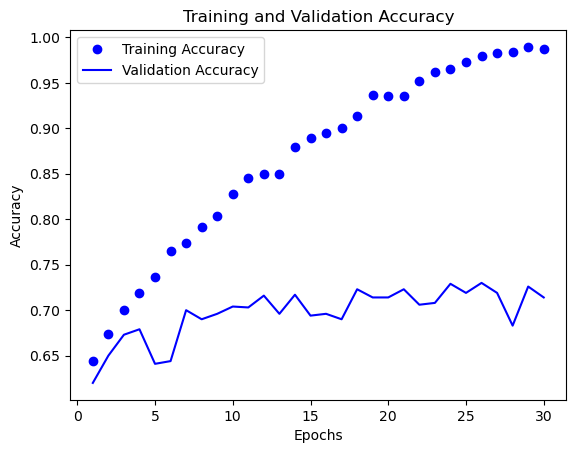

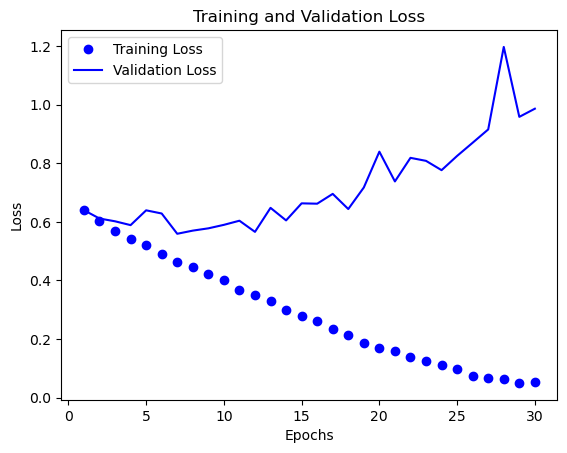

<Figure size 640x480 with 0 Axes>

In [11]:
# Curves for Loss and Accuracy during training

import matplotlib.pyplot as plt

epochs = range(1, 31)

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
plt.clf()

### Data Augumentation

In [27]:
datagen = ImageDataGenerator(
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                fill_mode = 'nearest'
                )

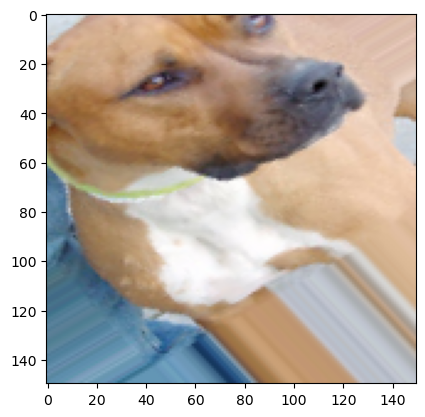

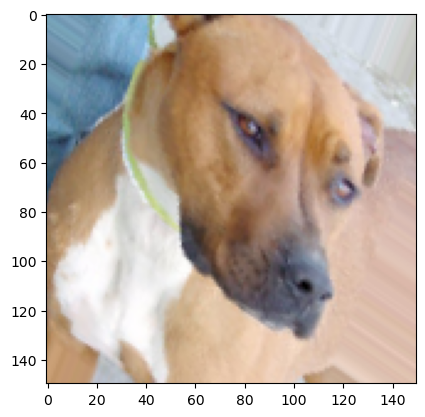

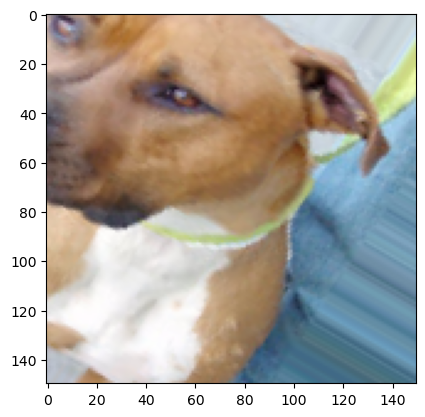

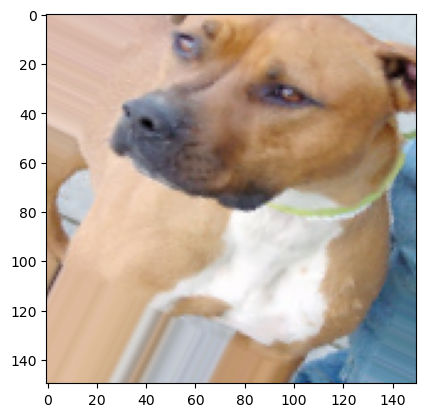

<Figure size 640x480 with 0 Axes>

In [28]:
from keras.preprocessing import image
from keras import utils

names = [os.path.join(train_dogs_dir, name) for name in os.listdir(train_dogs_dir)]
img_path = names[8]

img = utils.load_img(img_path, target_size = (150, 150))
x = utils.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    plt.imshow(utils.array_to_img(batch[0]))
    
    i += 1
    
    if i%4 == 0:
        break

plt.show()
plt.clf()

### Model that tackles overfitting

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(
                    rescale = 1.0/255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_generator = validation_datagen.flow_from_directory(
                            validation_dir,
                            target_size = (150, 150),
                            batch_size = 20,
                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit(
            train_generator, 
            steps_per_epoch = 100, 
            epochs = 100, 
            validation_data = validation_generator, 
            validation_steps = 50
            )

Epoch 1/100
100/100 [==============================] - 87s 839ms/step - loss: 0.6997 - accuracy: 0.5010 - val_loss: 0.6895 - val_accuracy: 0.5370
Epoch 2/100
100/100 [==============================] - 82s 816ms/step - loss: 0.6899 - accuracy: 0.5355 - val_loss: 0.7086 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 85s 846ms/step - loss: 0.6850 - accuracy: 0.5495 - val_loss: 0.6704 - val_accuracy: 0.5710
Epoch 4/100
100/100 [==============================] - 83s 826ms/step - loss: 0.6756 - accuracy: 0.5795 - val_loss: 0.6558 - val_accuracy: 0.6090
Epoch 5/100
100/100 [==============================] - 83s 833ms/step - loss: 0.6695 - accuracy: 0.5895 - val_loss: 0.6548 - val_accuracy: 0.6060
Epoch 6/100
100/100 [==============================] - 82s 823ms/step - loss: 0.6551 - accuracy: 0.6145 - val_loss: 0.6416 - val_accuracy: 0.6280
Epoch 7/100
100/100 [==============================] - 82s 813ms/step - loss: 0.6376 - accuracy: 0.6360 - val_loss: 0.6206 -

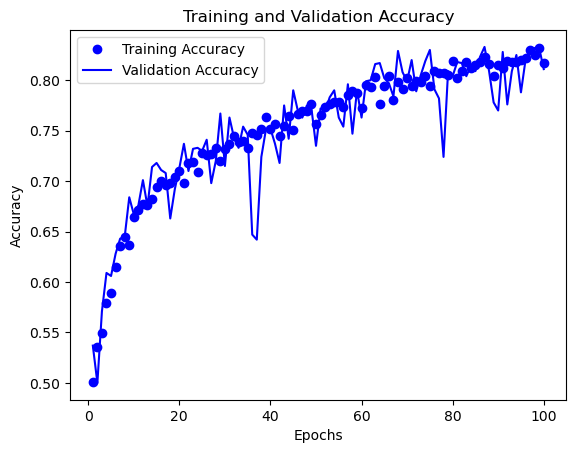

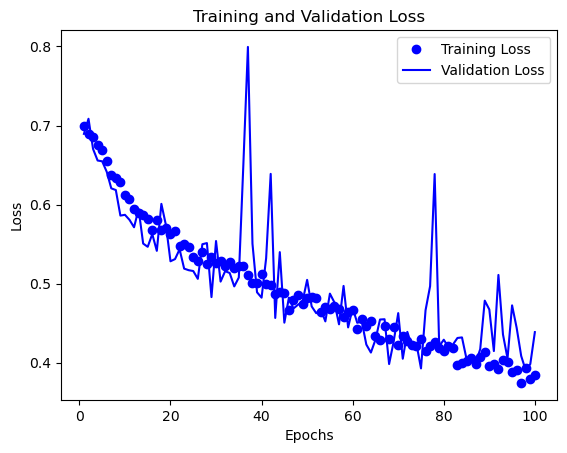

<Figure size 640x480 with 0 Axes>

In [33]:
# Curves for Loss and Accuracy during training

epochs = range(1, 101)

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

train_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
plt.clf()

In [34]:
model.save('cats_and_dogs_small.h5')